In [18]:
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [19]:
IMAGE_PATH = "test_image.jpg"

models = {
    "Detection": "yolo11n.pt",
    "Segmentation": "yolo11n-seg.pt",
    "Pose": "yolo11n-pose.pt"
}

In [20]:
def extract_layer_activation(model, image_path, layer_idx):
    activation = {}
    
    def hook(module, input, output):
        if torch.is_tensor(output):
            activation["data"] = output.detach().cpu()
        elif isinstance(output, (tuple, list)):
            activation["data"] = output[0].detach().cpu() if torch.is_tensor(output[0]) else None
    
    layer = model.model.model[layer_idx]
    handle = layer.register_forward_hook(hook)
    model(image_path, verbose=False)
    handle.remove()
    
    return activation.get("data")

In [21]:
for name, path in models.items():
    print(f"\n{name} Model")
    print("=" * 50)
    
    model = YOLO(path)
    layers = model.model.model
    
    print(f"Total layers: {len(layers)}")
    print(f"\nArchitecture:")
    
    for idx, layer in enumerate(layers):
        layer_type = type(layer).__name__
        print(f"  [{idx:2d}] {layer_type}")


Detection Model
Total layers: 24

Architecture:
  [ 0] Conv
  [ 1] Conv
  [ 2] C3k2
  [ 3] Conv
  [ 4] C3k2
  [ 5] Conv
  [ 6] C3k2
  [ 7] Conv
  [ 8] C3k2
  [ 9] SPPF
  [10] C2PSA
  [11] Upsample
  [12] Concat
  [13] C3k2
  [14] Upsample
  [15] Concat
  [16] C3k2
  [17] Conv
  [18] Concat
  [19] C3k2
  [20] Conv
  [21] Concat
  [22] C3k2
  [23] Detect

Segmentation Model
Total layers: 24

Architecture:
  [ 0] Conv
  [ 1] Conv
  [ 2] C3k2
  [ 3] Conv
  [ 4] C3k2
  [ 5] Conv
  [ 6] C3k2
  [ 7] Conv
  [ 8] C3k2
  [ 9] SPPF
  [10] C2PSA
  [11] Upsample
  [12] Concat
  [13] C3k2
  [14] Upsample
  [15] Concat
  [16] C3k2
  [17] Conv
  [18] Concat
  [19] C3k2
  [20] Conv
  [21] Concat
  [22] C3k2
  [23] Segment

Pose Model
Total layers: 24

Architecture:
  [ 0] Conv
  [ 1] Conv
  [ 2] C3k2
  [ 3] Conv
  [ 4] C3k2
  [ 5] Conv
  [ 6] C3k2
  [ 7] Conv
  [ 8] C3k2
  [ 9] SPPF
  [10] C2PSA
  [11] Upsample
  [12] Concat
  [13] C3k2
  [14] Upsample
  [15] Concat
  [16] C3k2
  [17] Conv
  [18] Conc

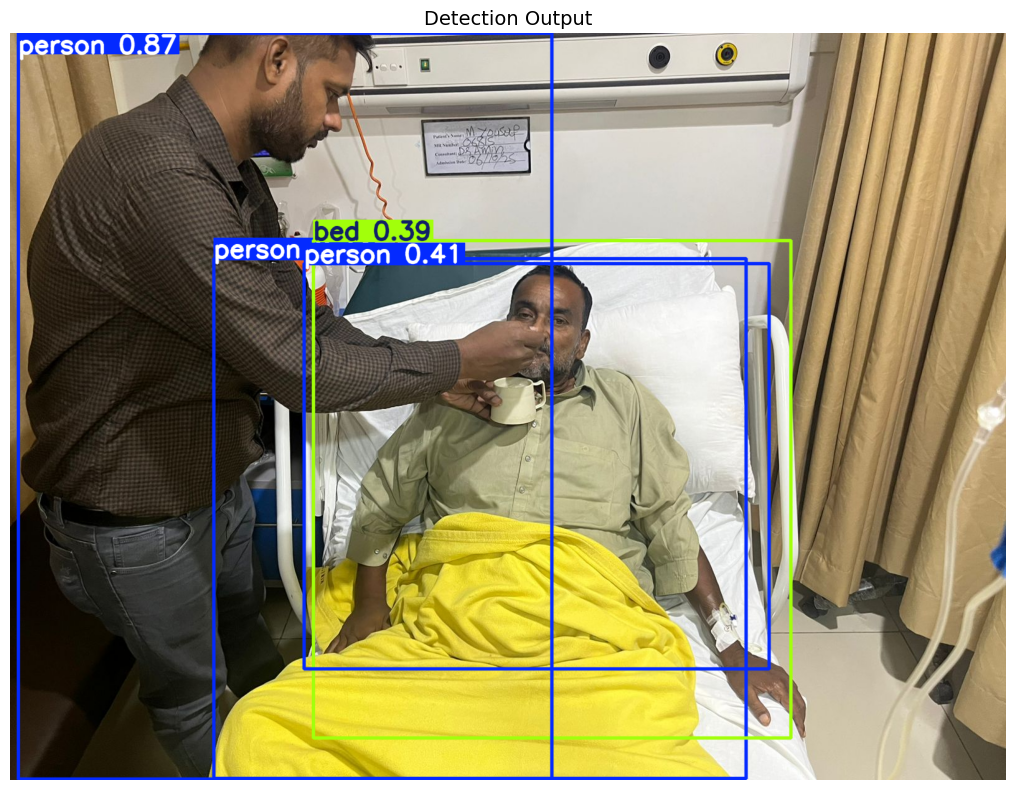

Boxes: 4


In [22]:
model_name = "Detection"
model = YOLO(models[model_name])

results = model(IMAGE_PATH, verbose=False)[0]
plotted = results.plot()

plt.figure(figsize=(12, 8))
plt.imshow(plotted[..., ::-1])
plt.title(f"{model_name} Output", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Boxes: {len(results.boxes)}")
if hasattr(results, 'masks') and results.masks:
    print(f"Masks: {len(results.masks)}")
if hasattr(results, 'keypoints') and results.keypoints:
    print(f"Keypoints: {results.keypoints.shape}")

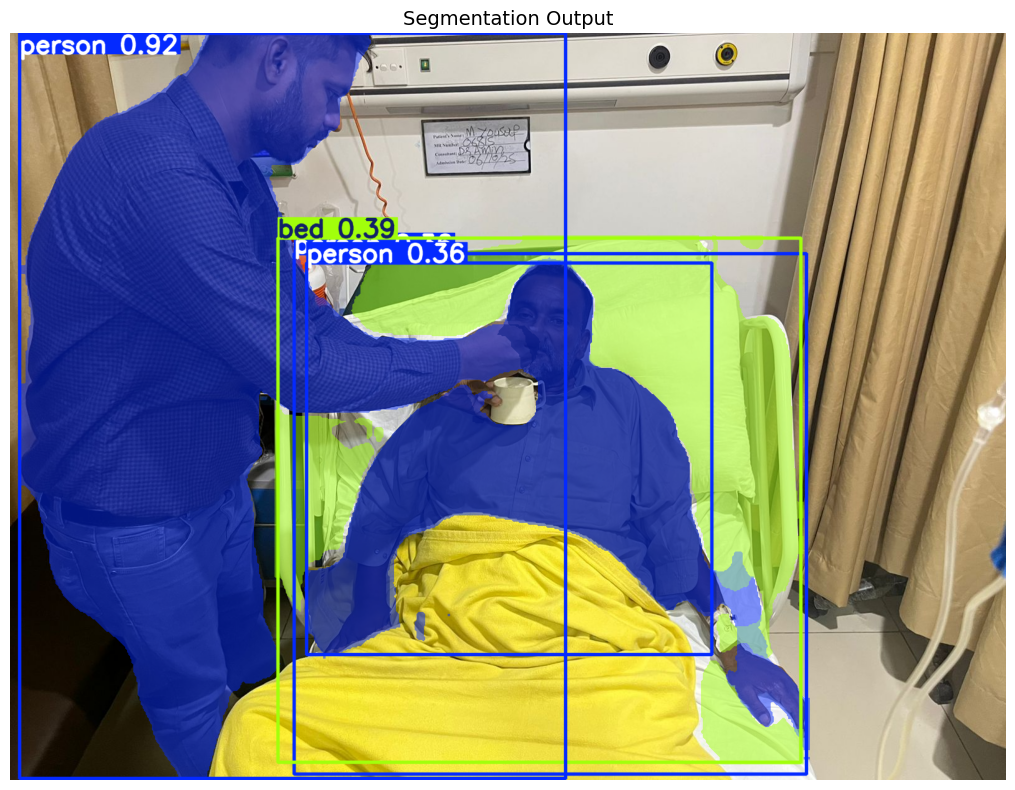

Boxes: 4
Masks: 4


In [23]:
model_name = "Segmentation"
model = YOLO(models[model_name])

results = model(IMAGE_PATH, verbose=False)[0]
plotted = results.plot()

plt.figure(figsize=(12, 8))
plt.imshow(plotted[..., ::-1])
plt.title(f"{model_name} Output", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Boxes: {len(results.boxes)}")
if hasattr(results, 'masks') and results.masks:
    print(f"Masks: {len(results.masks)}")

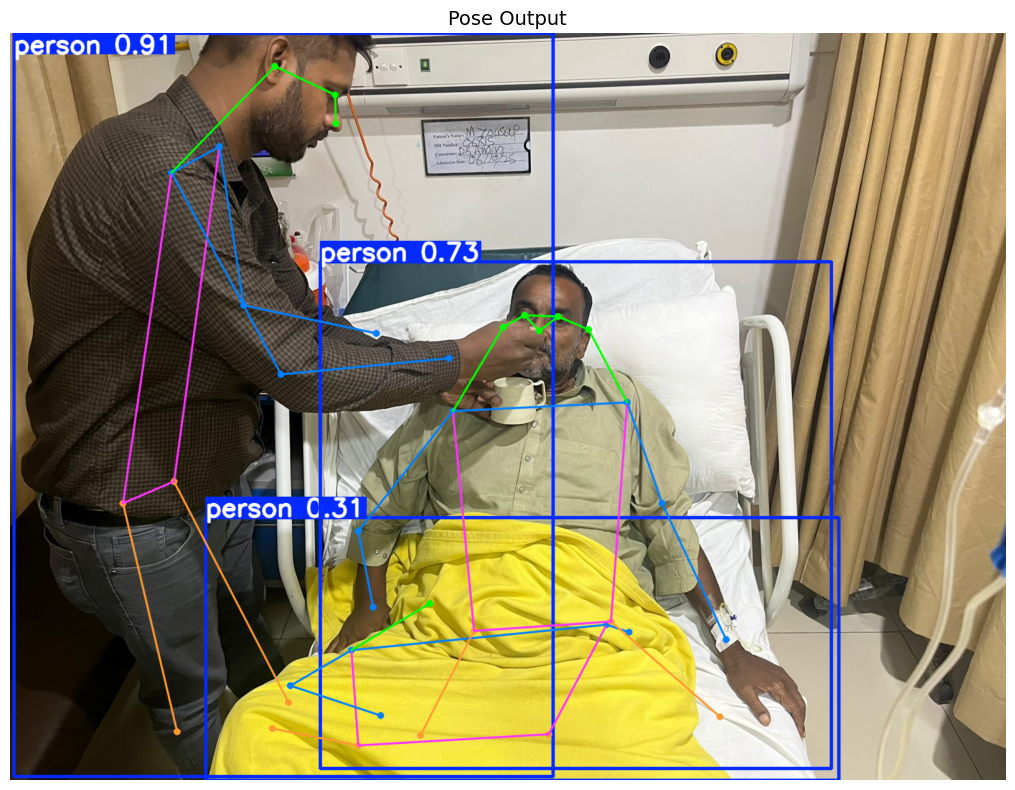

Boxes: 3
Keypoints shape: torch.Size([3, 17, 3])


In [24]:
model_name = "Pose"
model = YOLO(models[model_name])

results = model(IMAGE_PATH, verbose=False)[0]
plotted = results.plot()

plt.figure(figsize=(12, 8))
plt.imshow(plotted[..., ::-1])
plt.title(f"{model_name} Output", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Boxes: {len(results.boxes)}")
if hasattr(results, 'keypoints') and results.keypoints:
    print(f"Keypoints shape: {results.keypoints.shape}")

Layer 0: Conv
Feature map shape: torch.Size([16, 240, 320])
Channels: 16


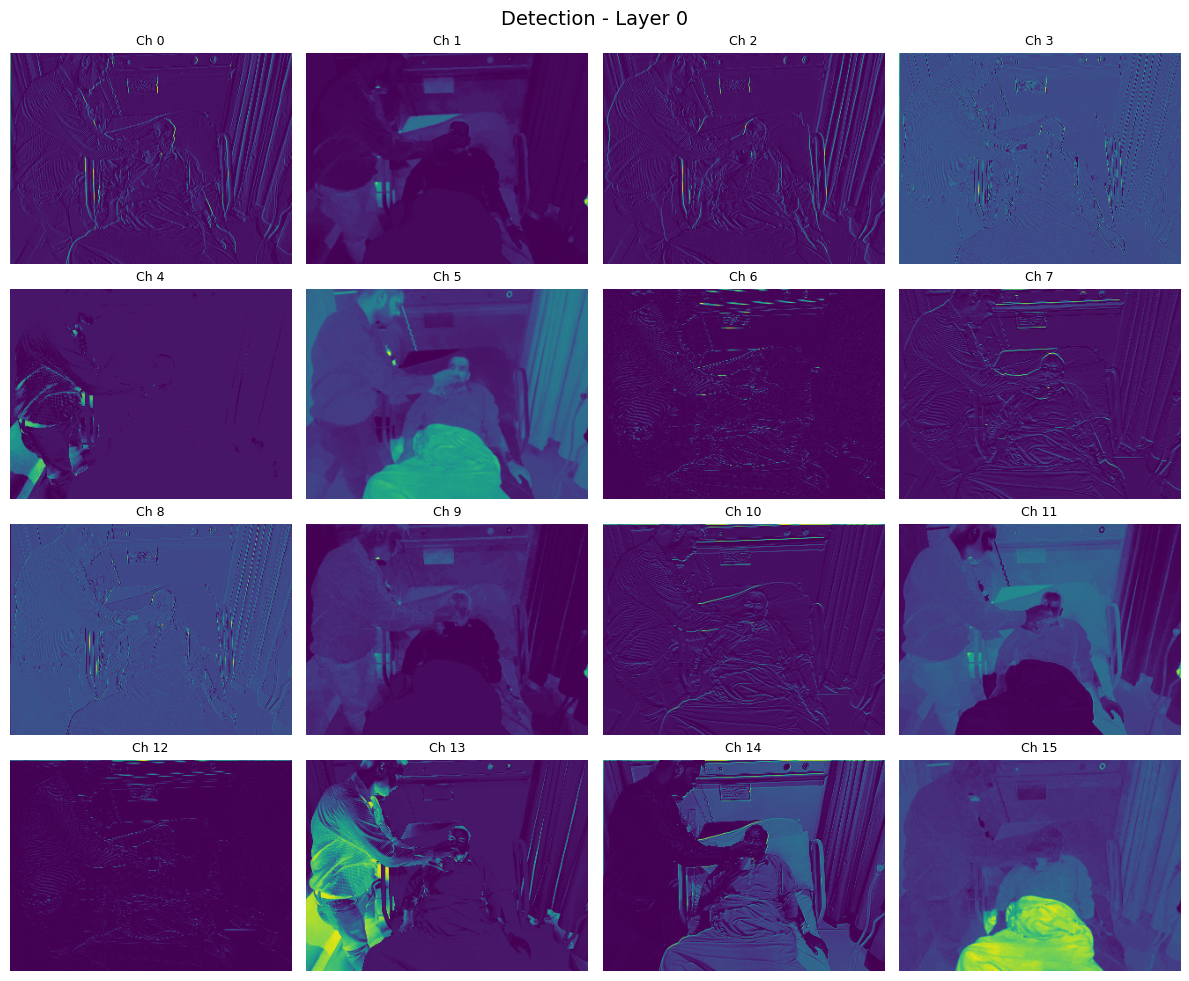

In [25]:
model_name = "Detection"
layer_idx = 0

model = YOLO(models[model_name])
feature_map = extract_layer_activation(model, IMAGE_PATH, layer_idx)

if feature_map is not None and feature_map.dim() == 4:
    feature_map = feature_map[0]
    num_channels = feature_map.shape[0]
    
    print(f"Layer {layer_idx}: {type(model.model.model[layer_idx]).__name__}")
    print(f"Feature map shape: {feature_map.shape}")
    print(f"Channels: {num_channels}")
    
    display_channels = min(16, num_channels)
    rows = 4
    cols = display_channels // rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten()
    
    for i in range(display_channels):
        axes[i].imshow(feature_map[i].numpy(), cmap='viridis')
        axes[i].set_title(f"Ch {i}", fontsize=9)
        axes[i].axis('off')
    
    plt.suptitle(f"{model_name} - Layer {layer_idx}", fontsize=14)
    plt.tight_layout()
    plt.show()

Layer 10: C2PSA
Feature map shape: torch.Size([256, 15, 20])
Channels: 256


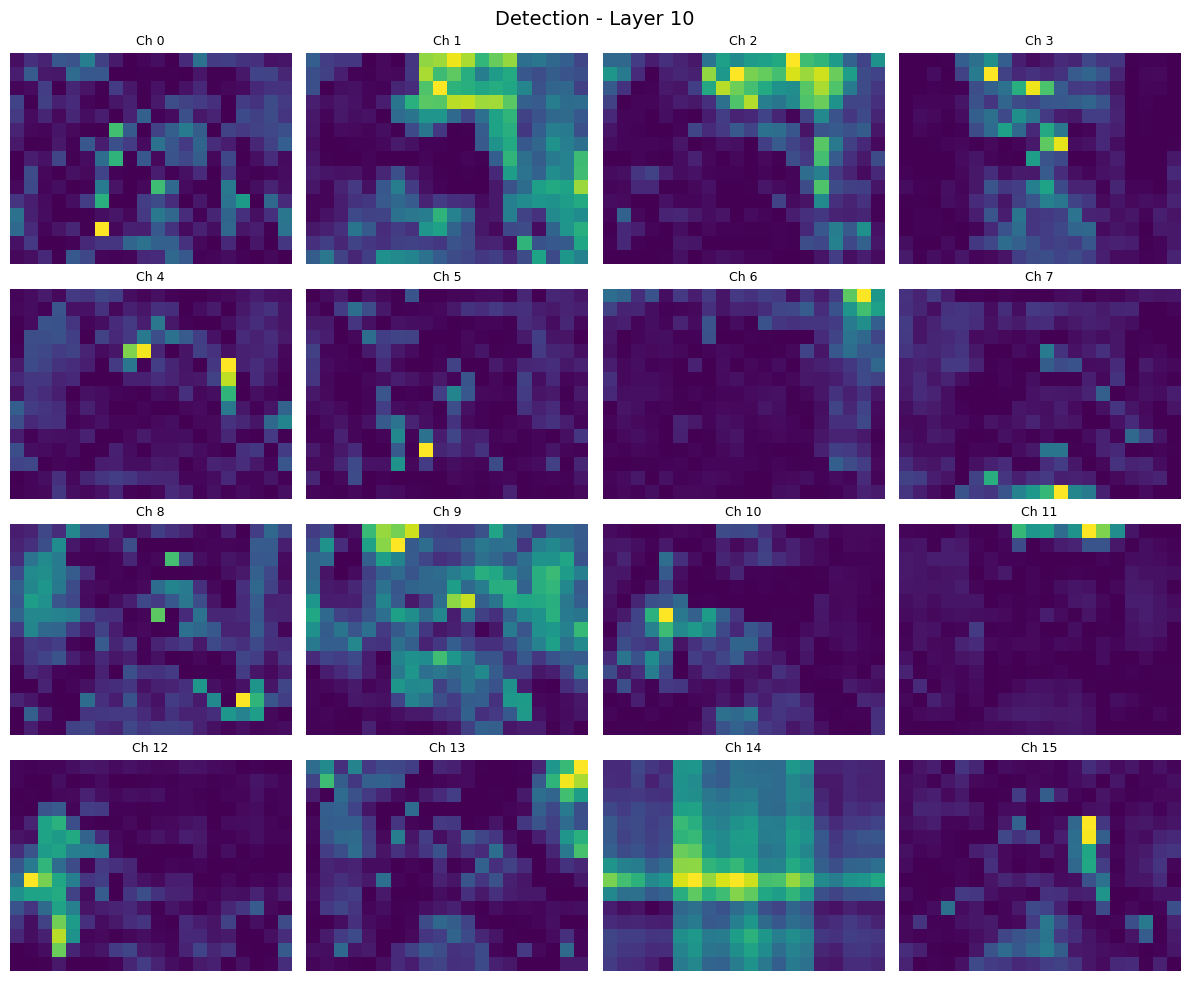

In [26]:
model_name = "Detection"
layer_idx = 10

model = YOLO(models[model_name])
feature_map = extract_layer_activation(model, IMAGE_PATH, layer_idx)

if feature_map is not None and feature_map.dim() == 4:
    feature_map = feature_map[0]
    num_channels = feature_map.shape[0]
    
    print(f"Layer {layer_idx}: {type(model.model.model[layer_idx]).__name__}")
    print(f"Feature map shape: {feature_map.shape}")
    print(f"Channels: {num_channels}")
    
    display_channels = min(16, num_channels)
    rows = 4
    cols = display_channels // rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten()
    
    for i in range(display_channels):
        axes[i].imshow(feature_map[i].numpy(), cmap='viridis')
        axes[i].set_title(f"Ch {i}", fontsize=9)
        axes[i].axis('off')
    
    plt.suptitle(f"{model_name} - Layer {layer_idx}", fontsize=14)
    plt.tight_layout()
    plt.show()

Layer 22: C3k2
Feature map shape: torch.Size([256, 15, 20])
Channels: 256


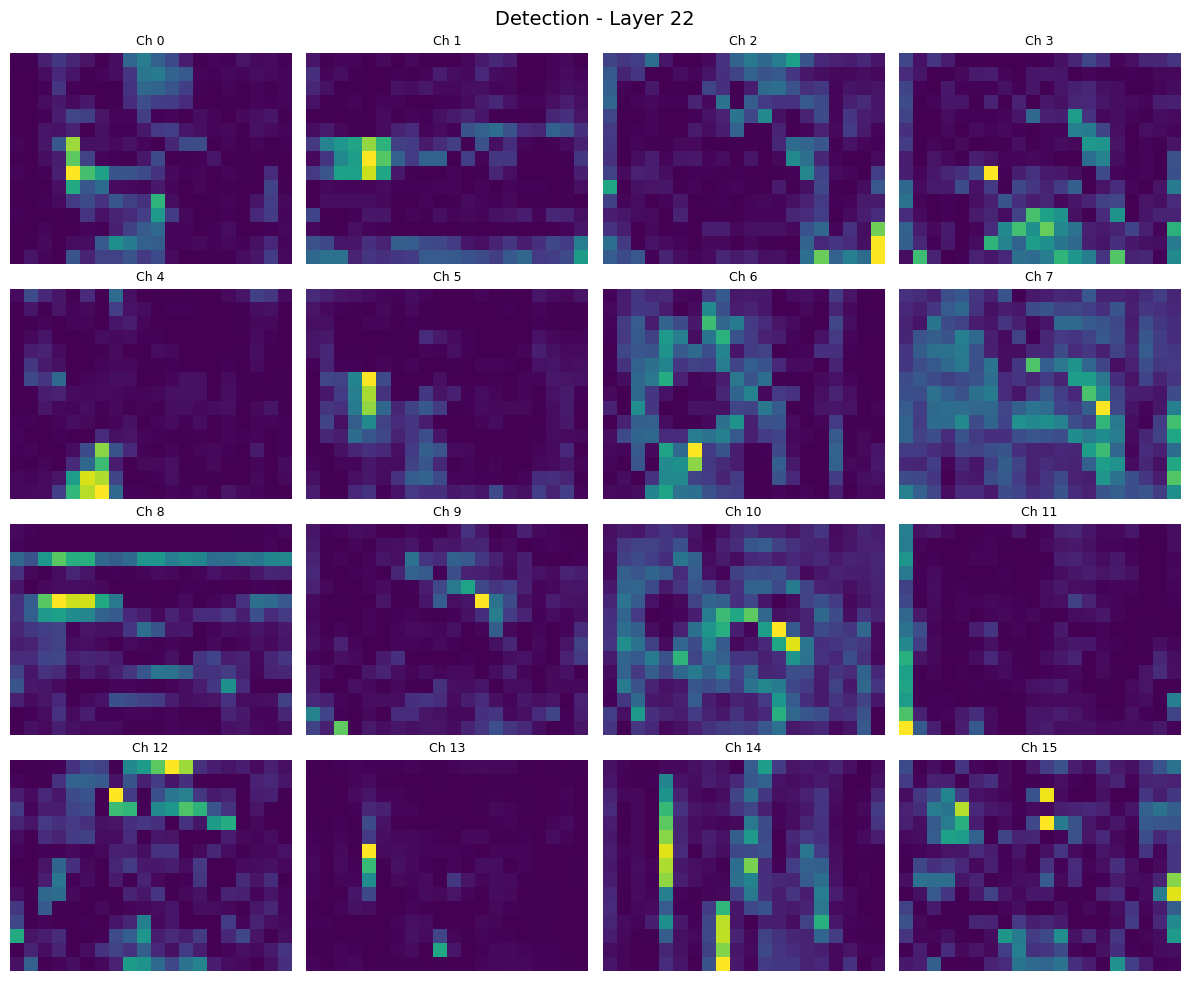

In [27]:
model_name = "Detection"
layer_idx = 22

model = YOLO(models[model_name])
feature_map = extract_layer_activation(model, IMAGE_PATH, layer_idx)

if feature_map is not None and feature_map.dim() == 4:
    feature_map = feature_map[0]
    num_channels = feature_map.shape[0]
    
    print(f"Layer {layer_idx}: {type(model.model.model[layer_idx]).__name__}")
    print(f"Feature map shape: {feature_map.shape}")
    print(f"Channels: {num_channels}")
    
    display_channels = min(16, num_channels)
    rows = 4
    cols = display_channels // rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten()
    
    for i in range(display_channels):
        axes[i].imshow(feature_map[i].numpy(), cmap='viridis')
        axes[i].set_title(f"Ch {i}", fontsize=9)
        axes[i].axis('off')
    
    plt.suptitle(f"{model_name} - Layer {layer_idx}", fontsize=14)
    plt.tight_layout()
    plt.show()

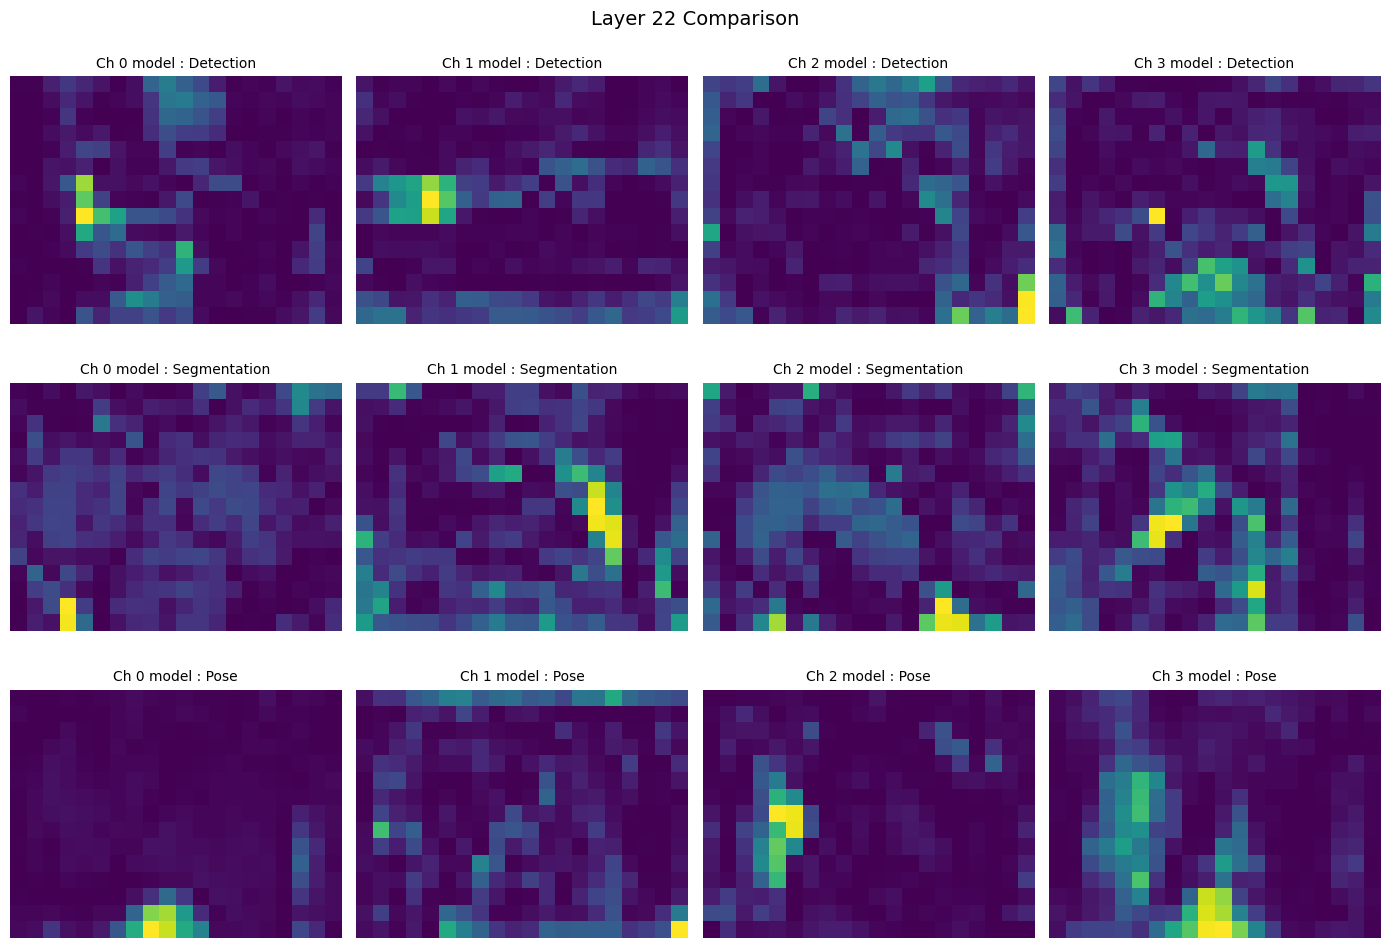

In [28]:
layer_idx = 22

fig, axes = plt.subplots(3, 4, figsize=(14, 10))

for row, (name, path) in enumerate(models.items()):
    model = YOLO(path)
    feature_map = extract_layer_activation(model, IMAGE_PATH, layer_idx)
    
    if feature_map is not None and feature_map.dim() == 4:
        feature_map = feature_map[0]
        
        for col in range(4):
            if col < feature_map.shape[0]:
                axes[row, col].imshow(feature_map[col].numpy(), cmap='viridis')
                axes[row, col].set_title(f"Ch {col}"+f" model : {name}", fontsize=10)
            axes[row, col].axis('off')
            
            if col == 0:
                axes[row, col].set_ylabel(name, rotation=0, ha='right', va='center', fontsize=11, weight='bold')

plt.suptitle(f"Layer {layer_idx} Comparison", fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
layer_idx = 23

model = YOLO("yolo11n.pt")
activation = {}

def hook(module, input, output):
    if isinstance(output, (tuple, list)):
        activation["data"] = [o.detach().cpu() if torch.is_tensor(o) else o for o in output]
    else:
        activation["data"] = output.detach().cpu()

layer = model.model.model[layer_idx]
handle = layer.register_forward_hook(hook)
results = model(IMAGE_PATH, verbose=False)[0]
handle.remove()

print(f"Layer {layer_idx} ({type(layer).__name__}) Output:")
print("=" * 50)

if isinstance(activation["data"], list):
    print(f"\nNumber of output tensors: {len(activation['data'])}")
    for i, tensor in enumerate(activation["data"]):
        if torch.is_tensor(tensor):
            print(f"  Tensor {i}: shape {tensor.shape}")
            if tensor.dim() == 3 and tensor.shape[0] == 1:
                num_detections = tensor.shape[1]
                num_features = tensor.shape[2]
                print(f"    {num_detections} detections x {num_features} features")
                print(f"    Features: [x, y, w, h, conf, class_0, class_1, ...]")
else:
    print(f"Output shape: {activation['data'].shape}")

print(f"\nPost-processed results:")
print(f"  Detected boxes: {len(results.boxes)}")
print(f"  Confidence range: [{results.boxes.conf.min():.3f}, {results.boxes.conf.max():.3f}]")

Layer 23 (Detect) Output:

Number of output tensors: 2
  Tensor 0: shape torch.Size([1, 84, 6300])
    84 detections x 6300 features
    Features: [x, y, w, h, conf, class_0, class_1, ...]

Post-processed results:
  Detected boxes: 4
  Confidence range: [0.345, 0.869]


In [30]:
model = YOLO("yolo11n.pt")
print("Model Architecture:")
print("=" * 50)

for idx, layer in enumerate(model.model.model):
    layer_type = type(layer).__name__
    print(f"[{idx:2d}] {layer_type}")
    
print("\nDetection Head (final layer):")
print(f"  Layer 23: {type(model.model.model[23]).__name__}")
print(f"  This layer outputs [x, y, w, h, confidence, class_probs]")

Model Architecture:
[ 0] Conv
[ 1] Conv
[ 2] C3k2
[ 3] Conv
[ 4] C3k2
[ 5] Conv
[ 6] C3k2
[ 7] Conv
[ 8] C3k2
[ 9] SPPF
[10] C2PSA
[11] Upsample
[12] Concat
[13] C3k2
[14] Upsample
[15] Concat
[16] C3k2
[17] Conv
[18] Concat
[19] C3k2
[20] Conv
[21] Concat
[22] C3k2
[23] Detect

Detection Head (final layer):
  Layer 23: Detect
  This layer outputs [x, y, w, h, confidence, class_probs]


In [31]:
model = YOLO("yolo11n.pt")
results = model(IMAGE_PATH, verbose=False)[0]

print("Detection Head Output Structure:")
print("=" * 50)
print(f"\nBoxes tensor shape: {results.boxes.data.shape}")
print(f"Boxes format: [x1, y1, x2, y2, confidence, class_id]")
print(f"\nSample detections:")
for i, box in enumerate(results.boxes.data[:3]):
    x1, y1, x2, y2, conf, cls = box
    print(f"  Box {i}: conf={conf:.3f}, class={int(cls)}")

print(f"\nConfidence scores range: [{results.boxes.conf.min():.3f}, {results.boxes.conf.max():.3f}]")
print(f"Mean confidence: {results.boxes.conf.mean():.3f}")

Detection Head Output Structure:

Boxes tensor shape: torch.Size([4, 6])
Boxes format: [x1, y1, x2, y2, confidence, class_id]

Sample detections:
  Box 0: conf=0.869, class=0
  Box 1: conf=0.412, class=0
  Box 2: conf=0.393, class=59

Confidence scores range: [0.345, 0.869]
Mean confidence: 0.505
